# <h1><center>Implémentation d’un simulateur boursier</center>

### Presentation du Code

Le code est divisé en 4 fichiers:
- Traders.py
- MarketMaker.py
- Simulation.py
- BlockSimulation.py


Chacun de ces fichiers contient des classes essentielles à l'implémentation du simulateur boursier complet. Celles-ci sont résumées dans le tableau qui suit accompagnées d'une courte description.


| Classe | Description |
| :-: | :-: |
| Trader | Classe mère des différents Traders|
| EvenTrader | Trader alternant vente et achat systematiquement |
| RandomTrader | Trader dont les décisions sont aléatoires (action et nombre de stocks vendus/achetés) |
| IntelligentTrader | Trader dont les décisions sont basées sur le prix d'achat et de vente afin de maximiser les retours |
| MarketMaker | Classe mère des Market Maker |
| GaussianMarketMaker | Market Maker dont la strategie de prix repose sur une distribution normale |
| Simulation | Classe pour lancer et visualiser une simulation |
| RunMultipleSimulations | Classe pour lancer et visualiser plusieurs simulations |


    
Nous commencerons par observer les resultats d'un unique 'run', puis observerons les resultats sur plusieurs 'run's avant de finir par tenter d'ameliorer le GaussianMarketMaker en trouvant les hyper-parametres qui lui assurent les meilleurs rendements.

In [1]:
from MarketMaker import GaussianMarketMaker
from Traders import EvenTrader, IntelligentTrader, RandomTrader
from Simulation import Simulation
from BlockSimulation import RunMultipleSimulations
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Single Run

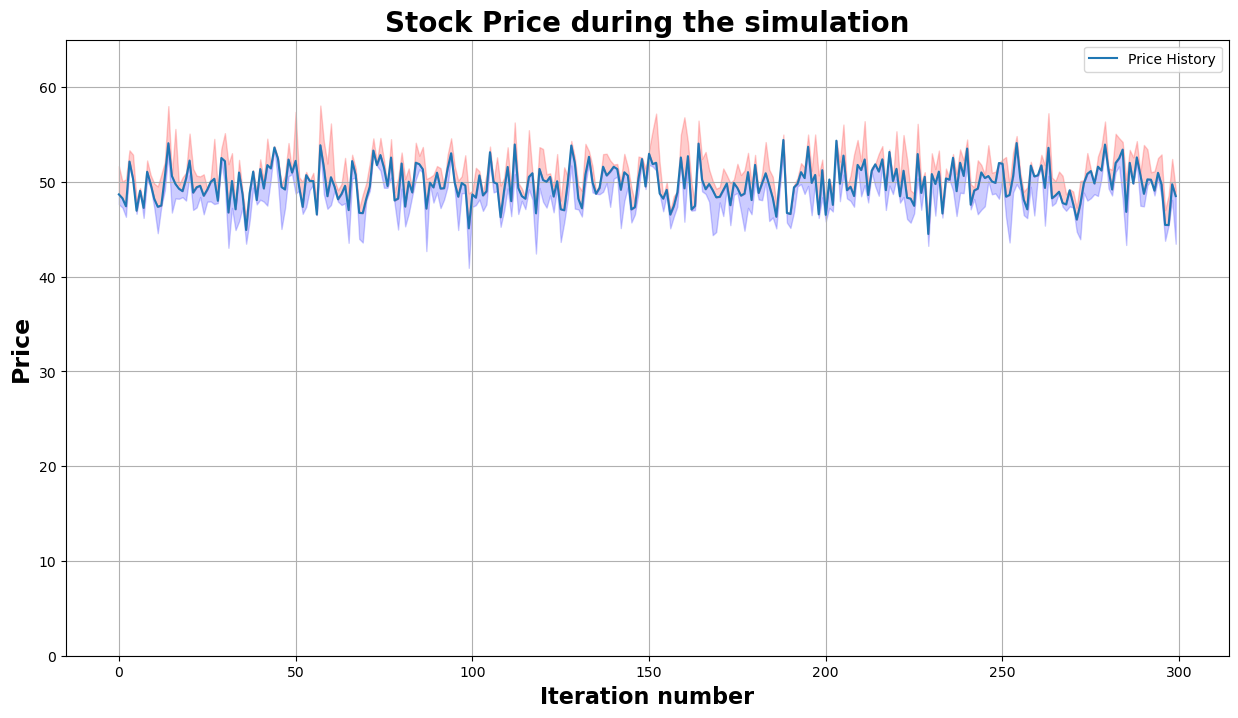


Disclaimer!

The following graph shows the PnL: it considers buying stock as decrease in profits and sellingstocks as increase in profits, as required.


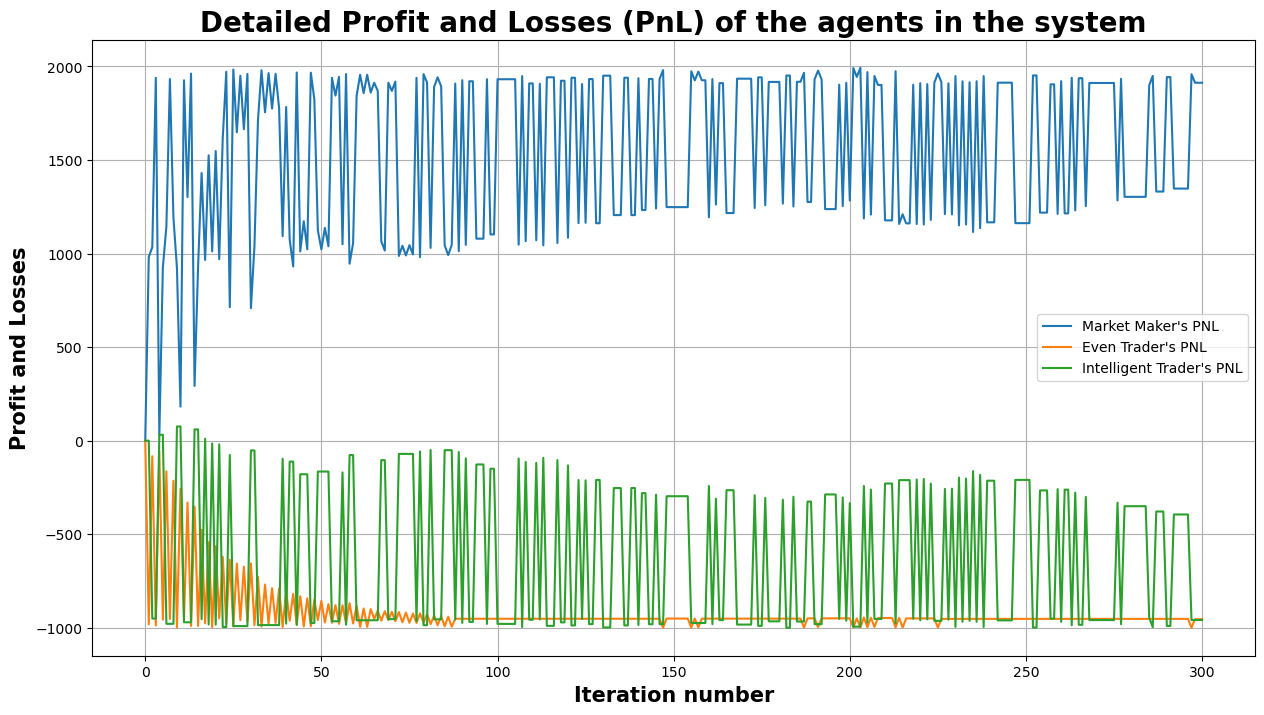

This plot is confusing and a better metric should be used to accurately display the system's status. Therefore, assets were plotted. Assets can be either cash or stocks. When it takes the form of stocks, it updates its value at each selling point.


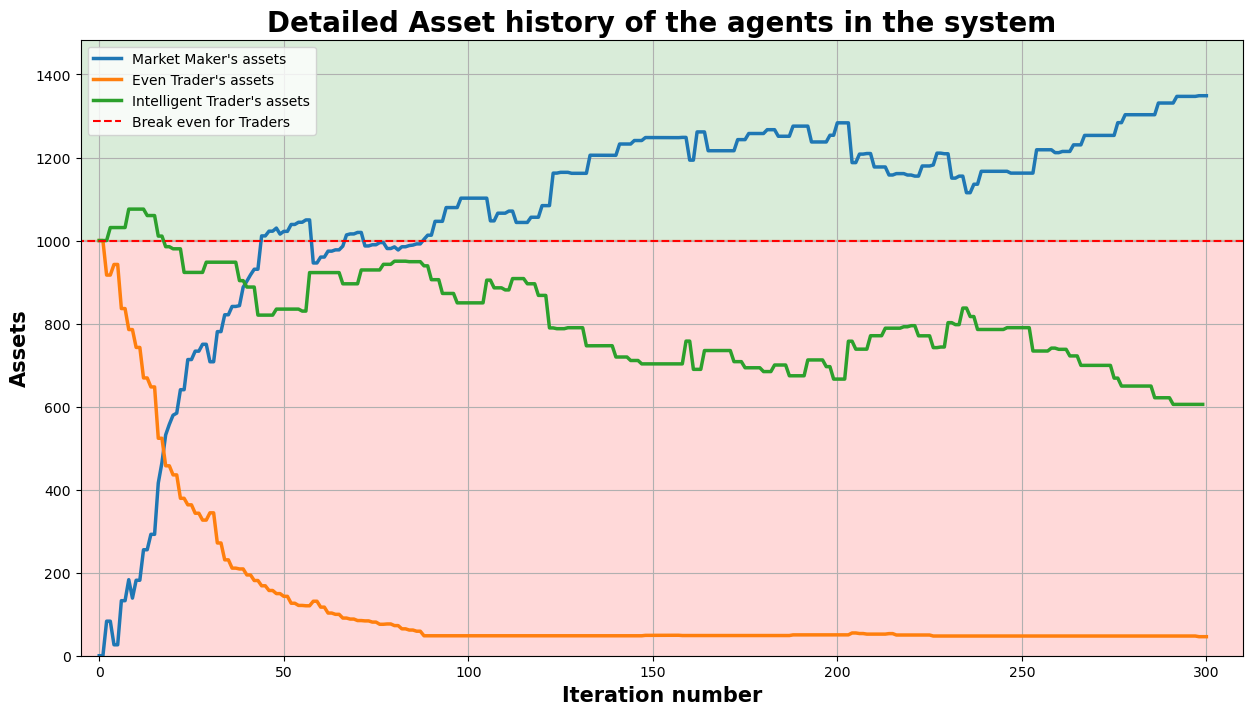

In [11]:
if __name__ == "__main__":
    # Create Traders
    my_even_trader = EvenTrader()
    my_intelligent_trader = IntelligentTrader(1000)
    traders = [my_even_trader, my_intelligent_trader]

    # Create Market Maker
    my_market_maker = GaussianMarketMaker()

    # Create Simulation
    my_simulation = Simulation(traders, my_market_maker)

    # Run and Display results
    my_simulation.run()
    my_simulation.display_results()

Ces premiers résultats semblent indiquer que les strategies suivies par le RandomTrader et le EvenTrader sont toutes deux perdantes, ce-dernier l'étant encore plus que le premier. En revanche, l'IntelligentTrader semble lui gagnant, presentant de nets gains. Afin de mieux investiguer ces premiers resultats, une classe regrouppant les resultats de nombreuses simulations est créée, ses resultats sont présentés ci-dessous.

# Multiple Runs

### Visualiser plusieurs résulats

Ci-dessous sont les moyennes des assets en fonctions du step number, obtenus avec 100 simulations.

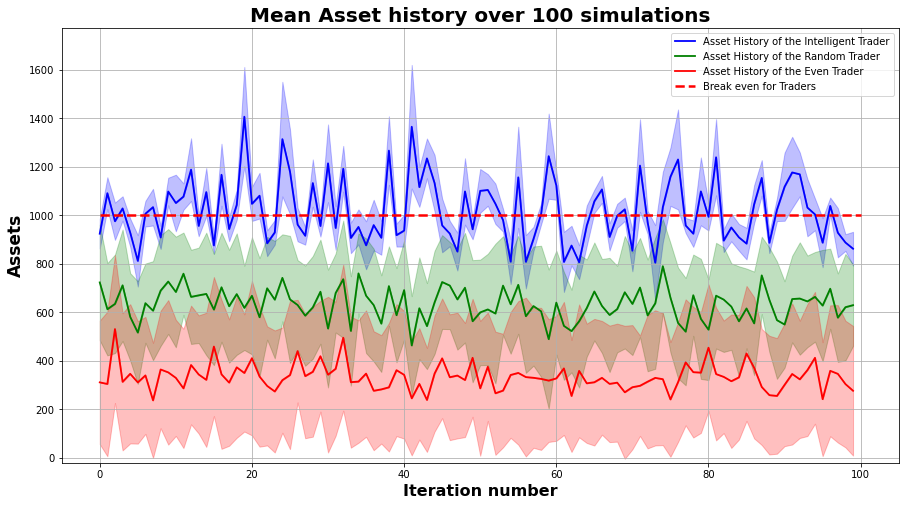

In [2]:
if __name__ == "__main__":
    # Create Traders
    my_even_trader = EvenTrader(1000)
    my_intelligent_trader = IntelligentTrader(1000)
    my_random_trader = RandomTrader(1000)
    traders = [my_intelligent_trader, my_random_trader, my_even_trader]

    # Create Market Maker
    my_market_maker = GaussianMarketMaker()

    # Create Simulation
    my_multiple_simulations = RunMultipleSimulations(traders, my_market_maker, number_of_iteration=100)

    # Run and Display results
    my_multiple_simulations.run_multiple_simulations()
    my_multiple_simulations.display_concatenated_history_of_assets()

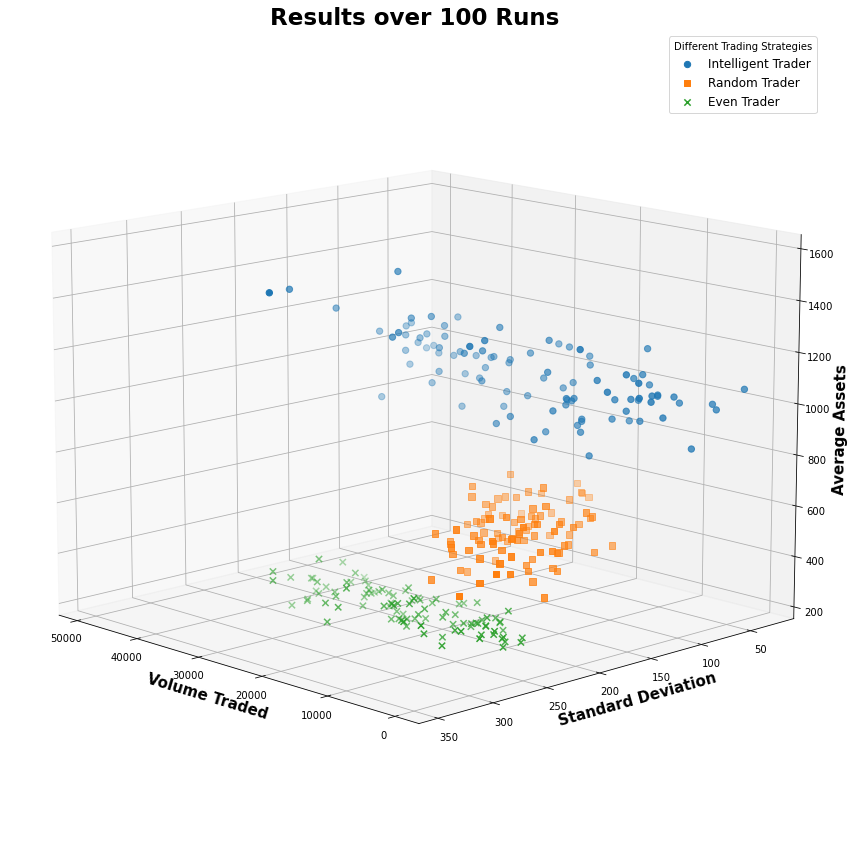

In [2]:
if __name__ == "__main__":
    my_multiple_simulations.display_complete_results(figsize=(16, 15))

Sous differents angles de vues:

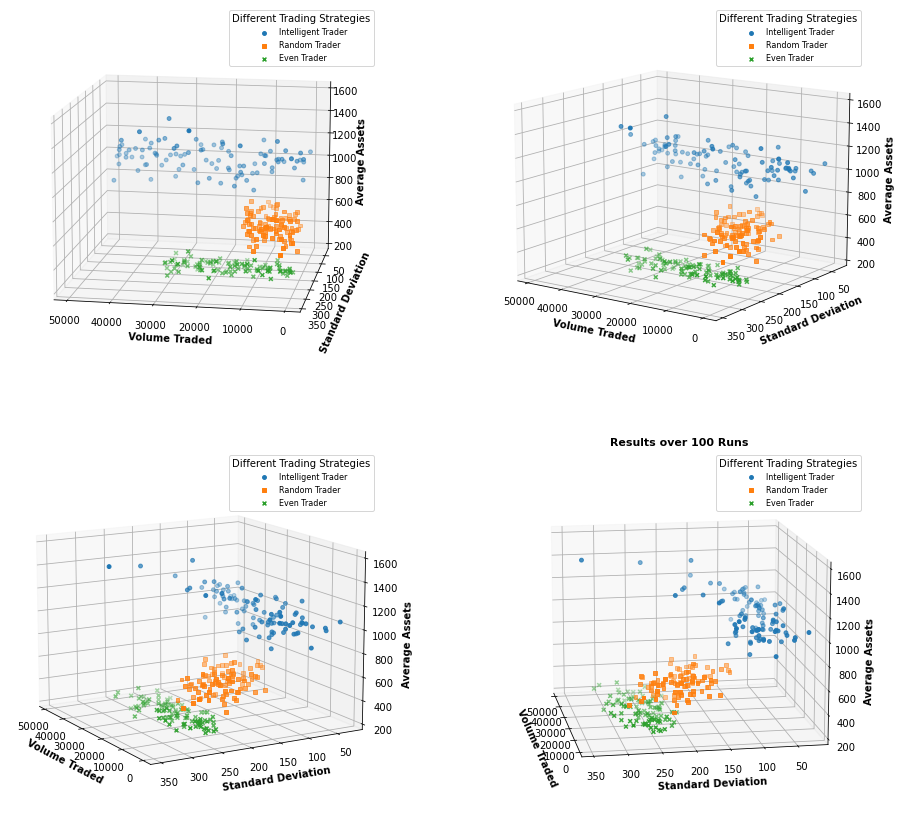

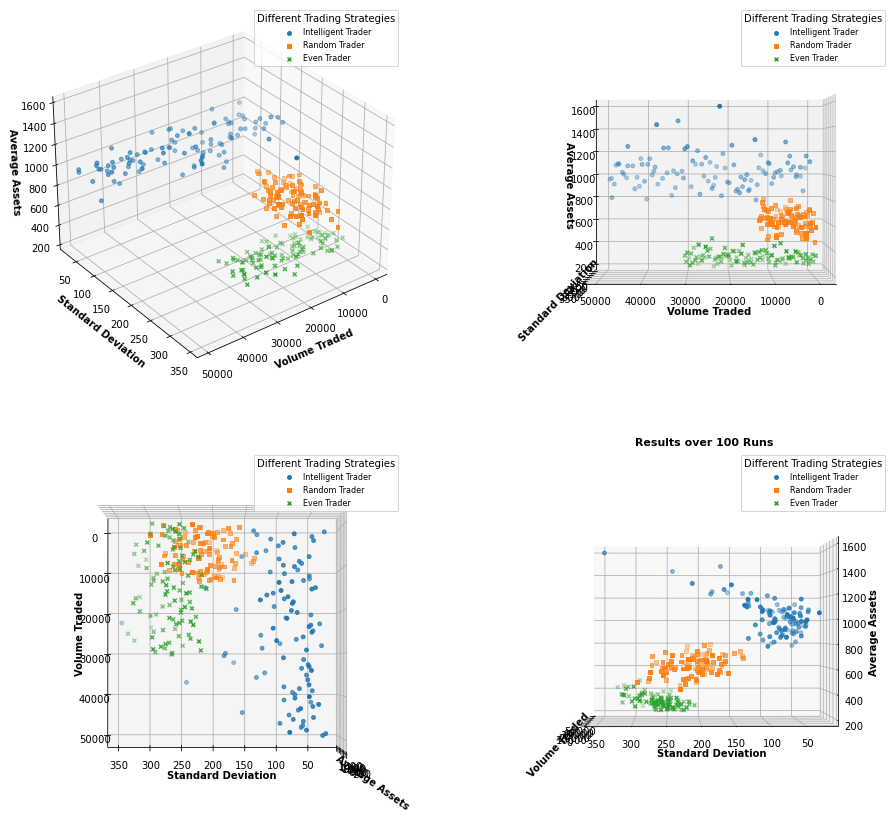

In [4]:
if __name__ == "__main__":
    my_multiple_simulations.display_multiple_complete_results()

Ces graphes 3D confirme les premiers resultats obtenus:
- Even Trader génère de très mauvais résultats
- Random Trader génère de mauvais résultats
- Intelligent Trader génère de bons-voire très bons-résultats

Une meilleure visualisation peut être obtenue en exécutant le ficher BlockSimulation.py directement. On pourra bouger la figure et donc mieux comprendre les resultats.

Il reste à trouver les meilleurs paramètres pour maximiser les profits du Market Maker cette fois-ci. Pour cela, une heat-map montrant les assets moyens du market maker en fonction de sa standard deviation et son average price (ceux-ci représentant les deux hyper-paramètres de la classe) est générée. Il est important de noter que la valeur correspondant à un couple d'hyper-paramètre est calculée en faisant la moyenne de 5 simulations.

### Optimiser le Gaussian Market Maker

100it [1:20:35, 48.36s/it]


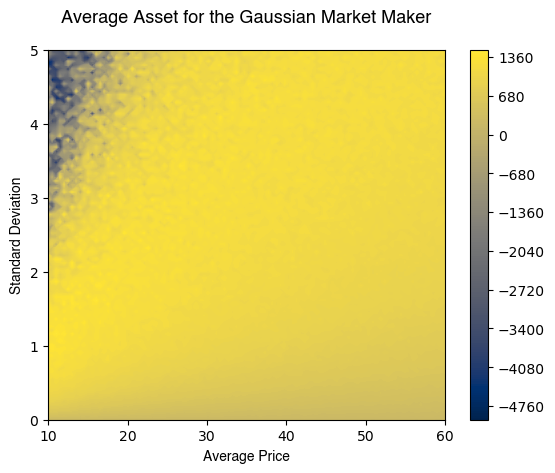

In [10]:
# Capé à -5000 et 5000 pour mieux visualiser

if __name__ == "__main__":
    my_multiple_simulations.display_price_slice(max_result=False,
                                                min_result=False,
                                                average_result=True,
                                                std_result=False,
                                                nb_of_replicates=50,
                                                avg_samples=100,
                                                std_samples=100,
                                                cap=5000)

Ces resultats montrent qu'il est préférable pour le market maker de définir ses prix avec un écart type relativement petit. L'Average Price semble lui aussi impacter ses retours. En effet, il apparaît qu'un faible prix semble être corrélé à un faible retour et inversement. Cela pourrait être dû à la proportion grandissante que represente l'écart type sur le prix lorsque celui-ci diminue. Afin de rendre notre market maker plus intelligent, il devrait minimiser son écart-type et maximiser son prix médian.

# Autres Graphes

### Max Results du Market Maker

Non capé

50it [04:01,  4.82s/it]


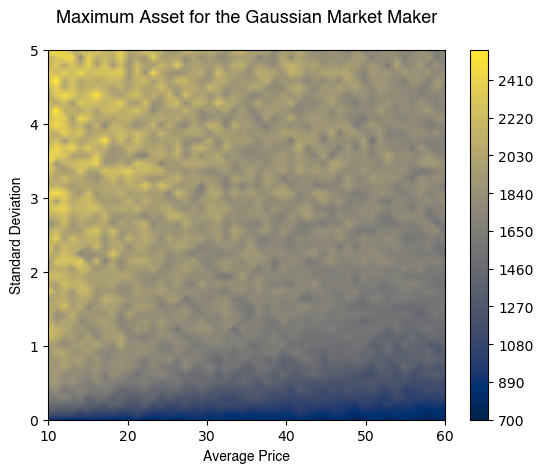

In [7]:
if __name__ == "__main__":
    my_multiple_simulations.display_price_slice(max_result=True,
                                                min_result=False,
                                                average_result=False,
                                                std_result=False,
                                                nb_of_replicates=10,
                                                avg_samples=50,
                                                std_samples=50,
                                               cap=float('inf'))

La région en haut à gauche semble à nouveau clé. En effet, il s'agit de la region enregistrant les pics d'assets les plus élevés pour le Market Maker. Cela n'est pas surprenant puisque c'est la région qui enregistre le plus fort écart type, comme le montre les prochains contour map, et par conséquent la plus forte volatilité. A noter que le contour plot est déjà compréhensible sans cap.

### Min Results du Market Maker

Non Capé

50it [04:03,  4.87s/it]


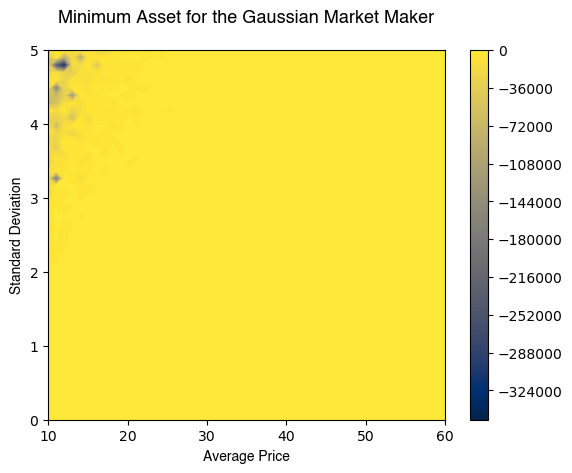

In [12]:
if __name__ == "__main__":
    my_multiple_simulations.display_price_slice(max_result=False,
                                                min_result=True,
                                                average_result=False,
                                                std_result=False,
                                                nb_of_replicates=10,
                                                avg_samples=50,
                                                std_samples=50,
                                                cap=float('inf'))

Capé à -3000

50it [04:01,  4.83s/it]
Locator attempting to generate 1001 ticks ([-3000.0, ..., 0.0]), which exceeds Locator.MAXTICKS (1000).


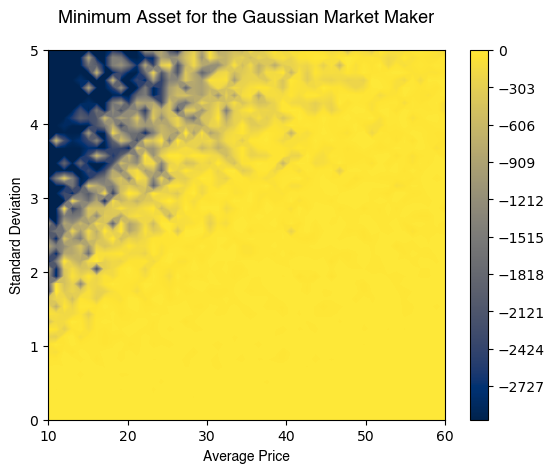

In [10]:
if __name__ == "__main__":
    my_multiple_simulations.display_price_slice(max_result=False,
                                                min_result=True,
                                                average_result=False,
                                                std_result=False,
                                                nb_of_replicates=10,
                                                avg_samples=50,
                                                std_samples=50,
                                                cap=3000)

Encore une fois, c'est en haut à gauche que l'on enregistre les valeurs les plus extrêmes.

### Ecart type des retours du Market Maker

Non capé

50it [04:08,  4.98s/it]


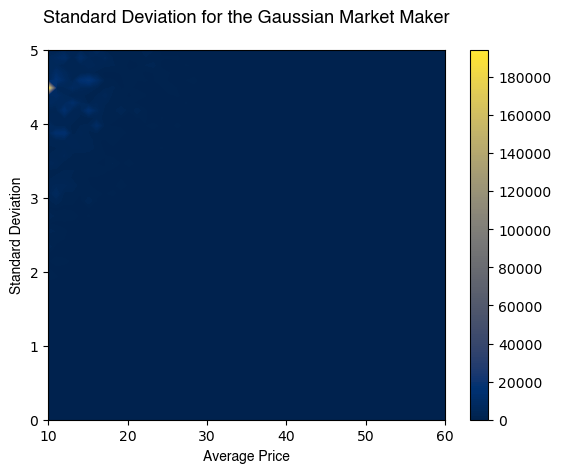

In [13]:
if __name__ == "__main__":
    my_multiple_simulations.display_price_slice(max_result=False,
                                                min_result=False,
                                                average_result=False,
                                                std_result=True,
                                                nb_of_replicates=10,
                                                avg_samples=50,
                                                std_samples=50,
                                                cap=float('inf'))

Capé à 5000

50it [04:13,  5.08s/it]


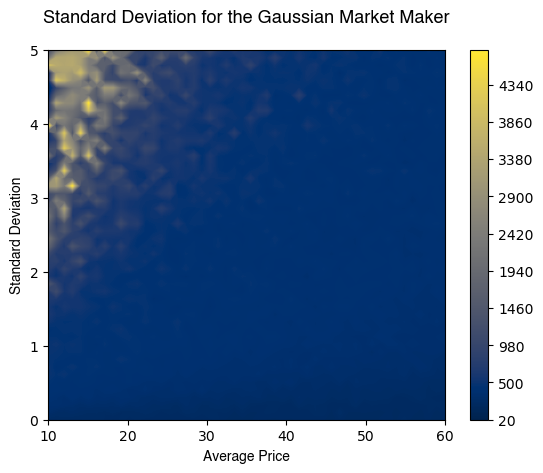

In [5]:
if __name__ == "__main__":
    my_multiple_simulations.display_price_slice(max_result=False,
                                                min_result=False,
                                                average_result=False,
                                                std_result=True,
                                                nb_of_replicates=10,
                                                avg_samples=50,
                                                std_samples=50,
                                                cap=5000)

Comme prédit, l'écart type est le plus grand dans cette région. Le market maker devrait donc adopter un average price et un écart type éloigné de cette région.